# 필요라이브러리 임포트

In [3]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import sys
import gensim
from gensim.models import Word2Vec
from konlpy.tag import Okt # 옛날 Twitter 클래스
okt = Okt()
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 한글 처리 코드 

In [10]:
import platform
path = "C:/Users/kccistc/AppData/Local/Microsoft/Windows/Fonts/나눔고딕L.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system... sorry~')

# Word2Vec 모델 불러오기

In [4]:
# Word2Vec 모델 불러오기
embedding_model = gensim.models.Word2Vec.load('word2VecModel')

# 시각화 함수 정의

In [11]:
def w2vvisualization(keyword):
    while True:
        try: 
            labels = []
            tokens = []
            okt = Okt()

            keyword2 = okt.morphs(keyword, stem=True)
            FirstKeyword = keyword2[0]

            VecWords = embedding_model.most_similar(positive=[FirstKeyword], topn=30)
            tokens = []
            labels = []
            for i in VecWords :
                labels.append(i[0])
                tokens.append(embedding_model[i[0]])

            tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
            new_values = tsne_model.fit_transform(tokens)

            x = []
            y = []

            for value in new_values:
                x.append(value[0])
                y.append(value[1])
            # print(x, y)

            a = pd.DataFrame(labels)
            x = pd.DataFrame(x)
            y = pd.DataFrame(y)

            df = pd.concat([a, x, y], axis = 1)
            df.loc[30] = (keyword, 0, 0)
            df.columns  = ['title', 'x', 'y']
            df

            plt.figure(figsize=(16, 16)) 
            plt.rc("font", size = 20)
            for i in range(len(x)-1):
                # plt.rcParams['font.family'] = 'hanygo250'
                plt.rcParams['axes.unicode_minus'] = False
                a = df.loc[[i, 30], :]
                plt.plot(a.x,a.y, '-D', linewidth = 2)
                plt.annotate(labels[i],
                                    xy=(df.x[i], df.y[i]),
                                    xytext=(5, 2),
                                    textcoords='offset points',
                                    ha='right',
                                    va='bottom')
            
            
            
            # plt.scatter(df.x[30], df.y[30], s = 1000, marker= '*')
            plt.annotate(keyword,
                            xy=(0, 0),
                            xytext=(10, 5),
                            textcoords='offset points',
                            ha='right',
                            va='bottom')


            plt.show()
            break

        except KeyError: 
            print('다시 입력해주세요. 키워드가 존재하지 않습니다. ')
            pass

# 키워드 입력 1 - 시각화
## 쳇번 쨰 키워드에 대한 w2v 의 시각화

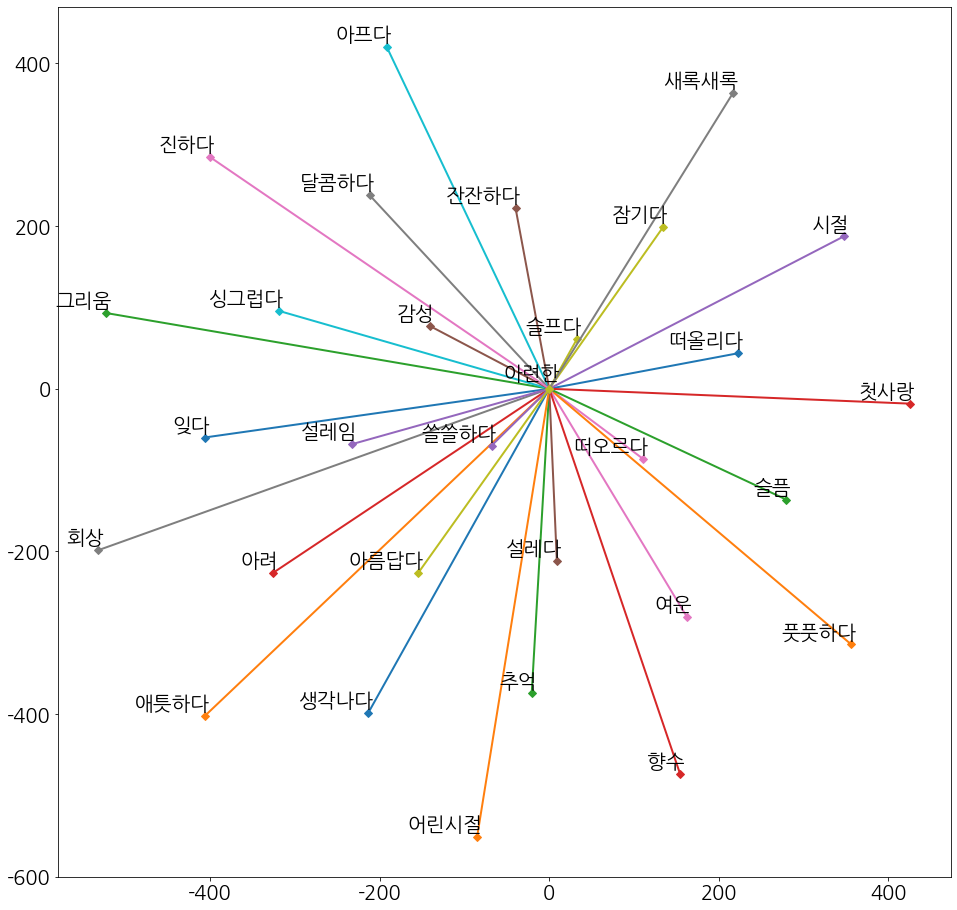

In [12]:
keyword = input("키워드 입력 : ") #로맨틱 #아련한
w2vvisualization(keyword)
keyword = okt.morphs(keyword, stem=True)
FirstKeyword = keyword[0]

# check embedding result
VecWords = embedding_model.most_similar(positive=[FirstKeyword], topn=100)
Veclist1 = []
for i in range(0,31):
    Veclist1.append(VecWords[i][0])
# Veclist1


In [4]:
Veclist1[:10]

['떠올리다', '애틋하다', '추억', '첫사랑', '시절', '설레다', '떠오르다', '달콤하다', '슬프다', '아프다']

# 키워드 입력 2 - 시각화
## 두번 쨰 키워드에 대한 w2v 의 시각화

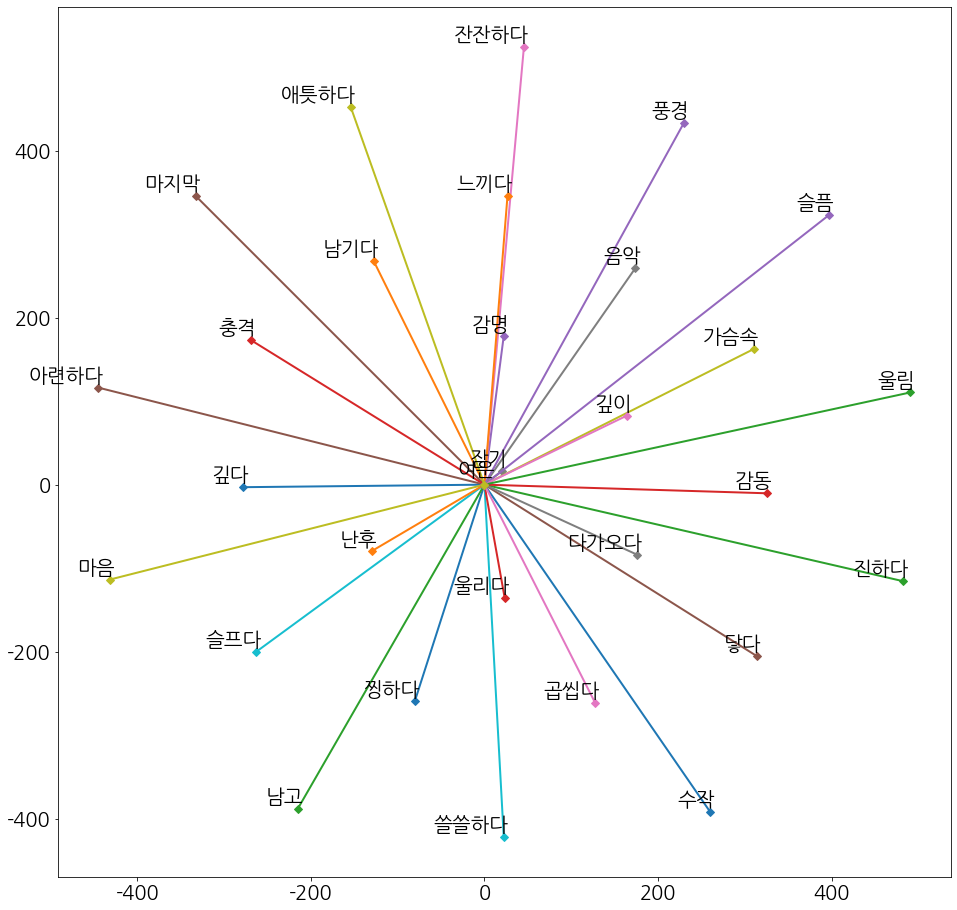

['깊다',
 '남기다',
 '진하다',
 '감동',
 '감명',
 '마지막',
 '잔잔하다',
 '잠기',
 '가슴속',
 '쓸쓸하다',
 '찡하다',
 '느끼다',
 '남고',
 '울리다',
 '슬픔',
 '아련하다',
 '깊이',
 '음악',
 '마음',
 '슬프다',
 '수작',
 '난후',
 '울림',
 '충격',
 '풍경',
 '닿다',
 '곱씹다',
 '다가오다',
 '애틋하다',
 '묵직하다',
 '아름답다']

In [15]:
keyword = input("키워드 선택 : ") # 잘생기다 #여운
w2vvisualization(keyword)
# keyword = okt.morphs(keyword)
keyword = okt.morphs(keyword, stem=True)
SecondKeyword = keyword[0]

# check embedding result
VecWords = embedding_model.most_similar(positive=[SecondKeyword], topn=100)
Veclist2 = []
for i in range(0,31):
    Veclist2.append(VecWords[i][0])
# Veclist2

# 키워드 입력 3 - 시각화
## 세번 쨰 키워드에 대한 w2v 의 시각화

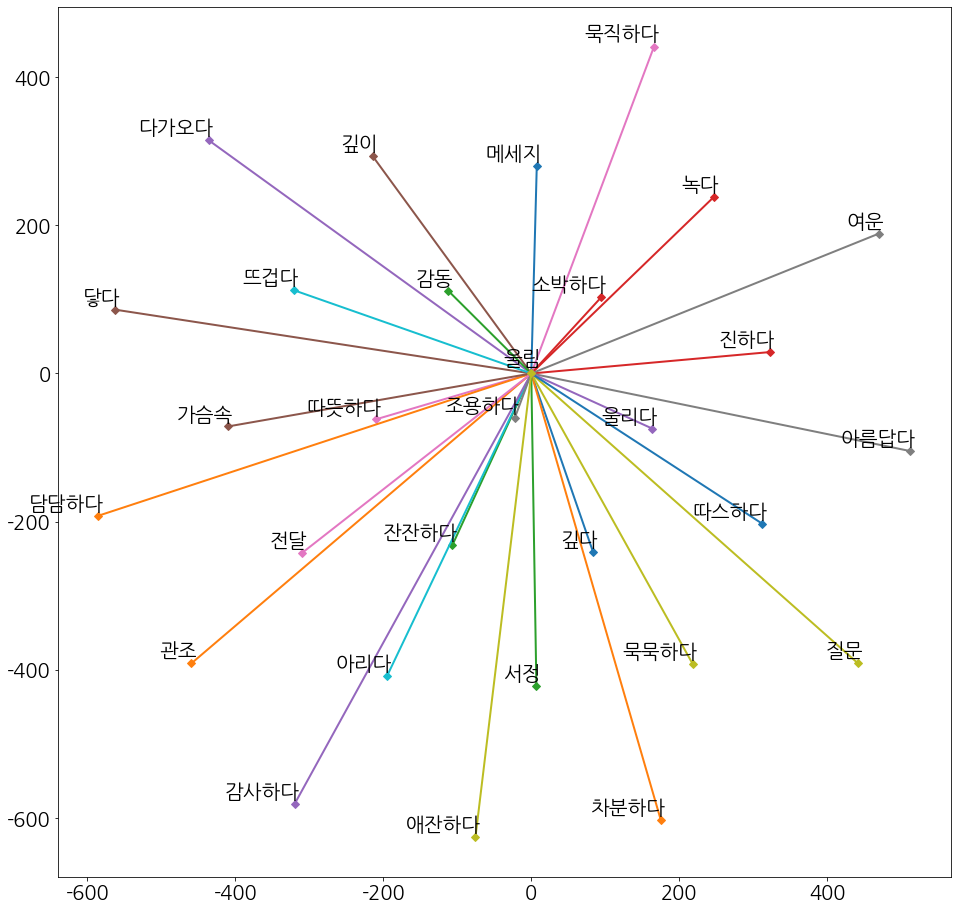

['깊다',
 '차분하다',
 '잔잔하다',
 '진하다',
 '다가오다',
 '깊이',
 '따뜻하다',
 '아름답다',
 '묵묵하다',
 '아리다',
 '메세지',
 '관조',
 '감동',
 '녹다',
 '울리다',
 '닿다',
 '묵직하다',
 '여운',
 '질문',
 '뜨겁다',
 '따스하다',
 '담담하다',
 '서정',
 '소박하다',
 '감사하다',
 '가슴속',
 '전달',
 '조용하다',
 '애잔하다',
 '섬세하다',
 '커다랗다']

In [17]:
keyword = input("키워드 선택 : ") # 매력 #울림
w2vvisualization(keyword)
keyword = okt.morphs(keyword, stem=True)
ThirdKeyword = keyword[0]

# check embedding result
VecWords = embedding_model.most_similar(positive=[ThirdKeyword], topn=100)
Veclist3 = []
for i in range(0,31):
    Veclist3.append(VecWords[i][0])
# Veclist3

# 키워드에 대한 가중치 설정 

In [18]:
myVec = ([FirstKeyword]+Veclist1[:10])*2 + ([SecondKeyword]+Veclist2[:5])*2 + [ThirdKeyword] + Veclist3[:5]
myVec2 = [FirstKeyword]*3+Veclist1+[SecondKeyword]*2+Veclist2[:5]+[ThirdKeyword] + Veclist3[:5]
len(myVec2)

47

# 리뷰 워드 데이터 불러오기 - 다음리뷰 기반 

In [20]:
# mymyCut.to_csv('리뷰코사인을위한데이터테이블3.csv', encoding='utf-8-sig', index=False)
mymyCut = pd.read_csv("리뷰코사인을위한데이터테이블3.csv")
mymyCut

# 가중치 준 리뷰와 영화 리뷰들의 코사인 유사도

In [22]:
mysent=""
for i in myVec2:
    mysent += "".join(i)
    mysent += " "
mysent

'아련하다 아련하다 아련하다 떠올리다 애틋하다 추억 첫사랑 시절 설레다 떠오르다 달콤하다 슬프다 아프다 잊다 풋풋하다 그리움 아려 쓸쓸하다 잔잔하다 여운 회상 잠기다 싱그럽다 생각나다 어린시절 슬픔 향수 설레임 감성 진하다 새록새록 아름답다 기억 꺼내다 여운 여운 깊다 남기다 진하다 감동 감명 울림 깊다 차분하다 잔잔하다 진하다 다가오다 '

In [23]:
mydf = pd.Series(['입력',mysent,mysent], index=["영화명","리뷰","word"])
mymyCut = mymyCut.append(mydf, ignore_index=True)
mymyCut.iloc[-1,:]

영화명                                                    입력
리뷰      아련하다 아련하다 아련하다 떠올리다 애틋하다 추억 첫사랑 시절 설레다 떠오르다 달콤...
word    아련하다 아련하다 아련하다 떠올리다 애틋하다 추억 첫사랑 시절 설레다 떠오르다 달콤...
Name: 30558, dtype: object

# TFIDF구하기

In [24]:
# TFIDF구하기
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf = TfidfVectorizer() 
Tfidf_matrix = Tfidf.fit_transform(mymyCut['word'])

In [25]:
print(Tfidf_matrix.shape) # shape 확인

(30559, 13467)


In [26]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(Tfidf_matrix, Tfidf_matrix)

In [27]:
# 제목별 인덱스숫자 테이블 만들기
# indices = pd.Series(data.index, index=mymyCut['리뷰']).drop_duplicates()
# 추천 함수 생성
def getRecommendation1(cosine_sim= cosine_sim):
    # idx = indices[title]
    simScores = list(enumerate(cosine_sim[-1])) #코사인유사도
    # simScores : 튜플 (인덱스,코사인유사도)
    simScores = sorted(simScores, key=lambda x: x[1] ,reverse=True)
    # 코사인유사도 기준 내림차순 정렬된 튜플중 자기 제외하고 20개 뽑음
    simScores = simScores[1:21]
    # 상위 20개 영화의 인덱스값 저장
    movieidx = [i[0] for i in simScores]
    RecMovielist = mymyCut.iloc[movieidx] 
    return RecMovielist[['영화명','리뷰']]

# 코사인 유사도 성능확인

In [28]:
getRecommendation1()

,영화명,리뷰
17554,할머니는 일학년,진한 감동의 여운이 잔잔하게 밀려드는 영화
5678,루터,마음에 진한 감동과 여운이 남는 영화네요
16754,늑대소년,동화같은 영화 보고나면 진한 여운이 가득 남는다
24096,연을 쫓는 아이,연은 서로를 이어주는 피보다 진한 것이였다
10547,우먼 인 골드,진한 여운을 주는 예술 영화 추천합니다
28323,거미숲,아련하기도 하고 정말 인상깊은 공포영화
23079,더 폴: 오디어스와 환상의 문,아름다운영상 아련한이야기
25171,초속5센티미터,첫사랑의 아련한 기억
27956,클로저,우연히 보게됐지만 깊은 여운을 남겼다
30513,번지점프를 하다,여운이 깊게 남는 아름다운 영화


# 영화 코사인 유사도 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import wordcloud
%matplotlib inline
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

import re
import collections
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

# 딕셔너리형으로 저장된 리뷰 데이터 불러오기 - 모든 사이트 리뷰들

In [2]:
# load
with open('movie_dict.pickle', 'rb') as f:
    movie_dict = pickle.load(f)

# 딕셔너리를 데이터 프레임화 하기

In [20]:
# 딕셔너리를 데이터 프레임화 하기
df = pd.DataFrame(list(movie_dict.items()),columns = ['title','review'])  
df

,title,review
0,카오산 탱고,전주 국제 영제 과거 따라가다 남자 실 마주 하다 펼쳐지다 진정하다 여 영상 음악 ...
1,욕창,한국 가족제도 전 딜레마 빠지다 노년 나날 깊다 생생하다 다루다 우리 모두 가지 있...
2,바다로 가자,우린 여기 태어나다 아버지 그립다 있다 갈다 없다 모르다 바닷가 바다 건너다 갈수 ...
3,국도극장,서울 젠겨 고이 주다 막연하다 위로 있다 외로워 중국집 시퀀스 웃기다 진지하다 내용...
4,레미: 집 없는 아이,광하다 초록 자연 펼쳐지다 가슴 상쾌하다 기분 거기 프랑스 시골 소년 레미 순수하다...
...,...,...
7628,미트 페어런츠,이상하다 되다 없다 최근 장인 사람 만날 완전하다 꼬이다 버리다 드니 이다 게이 로...
7629,쥬브나일,토리 싱고 연기 좋다 어린이 영 위 제대로 녹다 들다 있다 특출하다 유치하다 않다 ...
7630,게임오버,나이 보지 않다 영원하다 영 이다 인생 최초 안경 보다
7631,이유없는 반항,우울하다 사춘기 격정 보여주다 고등학생 자동차 문 가정 비치 되다 권총 조금 극단 ...


# tf-idf 행렬만들기 - 코사인 유사도 만들기

In [21]:
# tf-idf 행렬만들기
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.review)

In [22]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [23]:
indices = pd.Series(df.index, index = df.title) # 영화 제목으로 인덱스만들기
print(indices) 

title
카오산 탱고            0
욕창                1
바다로 가자            2
국도극장              3
레미: 집 없는 아이       4
               ... 
미트 페어런츠        7628
쥬브나일           7629
게임오버           7630
이유없는 반항        7631
천사의 시          7632
Length: 7633, dtype: int64


# 코사인 유사도 추천시스템 함수 정의

In [24]:
def movie_Recommendation(title, cosine_sim=cosine_sim):
    
    idx = indices[title]

    # 모든 영화에 대해서 해당 영화와의 유사도를 구하기
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse = True) # score 순으로 정렬

    sim_scores = sim_scores[1:11] # 가장 유사한 10개의 영화를 받아옴
    movie_indices = [i[0] for i in sim_scores] # 인덱스 받아오기
    
    result_df = df.iloc[movie_indices].copy()  #기존에 읽어들인 데이터에서 해당 인덱스의 값을 가져오기 스코어 열을 추가
    result_df['score'] = [i[1] for i in sim_scores]
    
    # 가장 유사한 10개의 영화의 제목을 리턴
    return result_df


# 코사인 유사도 & 워드 클라우드 시각화 

In [48]:
import stylecloud
x = "C:\\Users\\kccistc\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BMHANNAPro.ttf"

In [46]:

def creatplot(a):
    reclist = movie_Recommendation(a)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = reclist, y = 'title', x ='score', palette= "BuGn_r")
    plt.show()


    indexmorphs =  df.loc[df['title'] == a].index[0]
    morphs = df['review'][indexmorphs]
    morphs = re.sub('[^가-힣\s]*', '',str(morphs)).split(" ") # 형태소 분류
    textdict = collections.Counter(morphs) # 비율 dict 표현
    textdict[a] = max(textdict.values())*2 # 제목 비중 높이기
        # stylecloud 저장
    stylecloud.gen_stylecloud(text = textdict, icon_name="fas fa-comment-alt",palette="colorbrewer.diverging.Spectral_10",background_color='black',output_name="ttt.png", font_path=x)
    

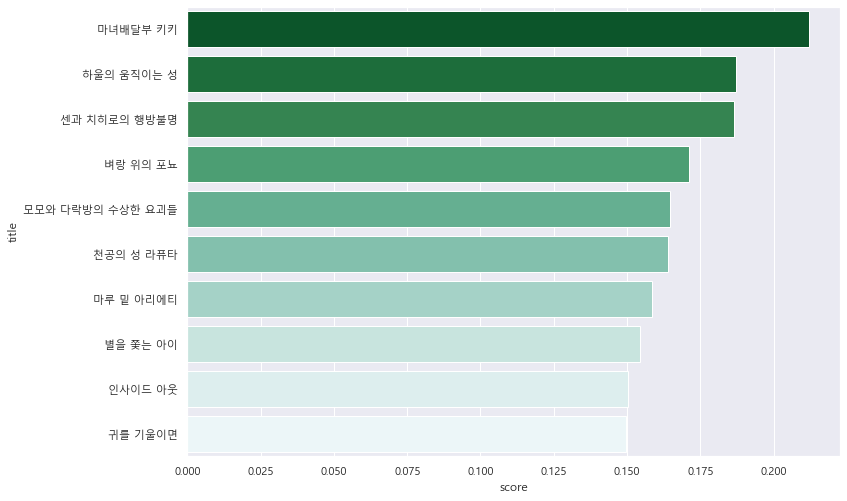

In [47]:
a = input("영화를 입력하세요 : ")
creatplot(a)